## Table of Contents

1. [Introduction](#intro)
2. [Data Exploration](#data_exploration)
3. [Feature Engineering](#feature_engineering)
4. [Modeling](#modeling)
5. [Submission](#submission)





## 1. Introduction
<a id='intro'></a>
This kernel consists of three parts. For the first part, Data Exploration, in order to explain the relationship between independent features and dependent feature, we will explore the dataset by visualizing and using various statistical methods. This step can give you some insight which features play an important role in prediction. For the second part, Feature Engineering, based on the result of analysis in the first part, we will manipulate and clean the dataset for the next step, modeling. In the last step, we will be working on popular machine learning algorithms (models) for prediction. Lastly, I am excited to share my first kernel with Kagglers and I hope this notebook helpful !    

## 2. Data Exploration
<a id='data_exploration'></a>
-  Data Extraction
-  Visualization
-  Analysis

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
plt.style.use('seaborn-colorblind')
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore',category=DeprecationWarning)

from IPython.display import Image
from collections import Counter
from scipy.stats.mstats import normaltest
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder

In [2]:
# Before we dive into the main game, let's take a look at the training set.

df = pd.read_csv("train.csv")

In [3]:
# check the dimension and first five rows of training set

print("Dimension:",df.shape)
df.head()

Dimension: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Let's see if there is any missing value in dataset and useful information for further analysis
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age and Cabin features get a large share of the missing values

In [5]:
df.Age.fillna(df.Age.median(),inplace=True)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In order to analyze without missing values and see the general picture of dataset, it may be a good idea to choose the median over mean to replace missing values in Age column with the median ages since **the median is more robust to outliers.**

##### Sex

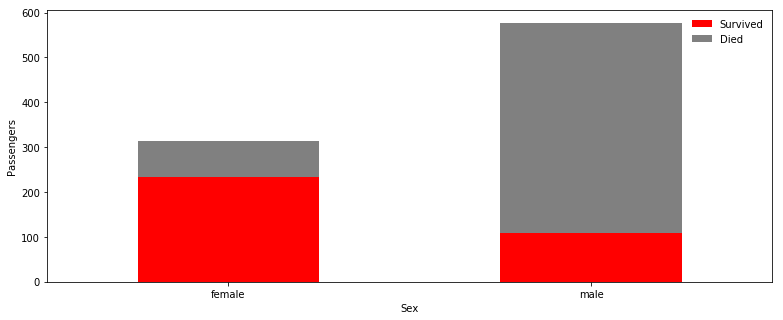

In [6]:
df['Died'] = (df['Survived'] == 0).map(lambda x: 1 if x == True else 0)
df.groupby('Sex').agg('sum')[['Survived','Died']].plot(kind='bar',stacked=True,colors=['red','grey'],figsize=(13,5))
plt.legend(frameon=False)

ax = plt.gca()
for item in ax.xaxis.get_ticklabels():
    item.set_rotation(0)
    
plt.ylabel("Passengers")

In [7]:
df.groupby('Sex').agg('mean')[['Survived']]

,Survived
Sex,
female,0.742038
male,0.188908


>-  The plots and mean table clearly shows that **female passengers are more likely to survive.**<br>
>-  **Sex variable may be very useful to predict the survival** 

##### Age

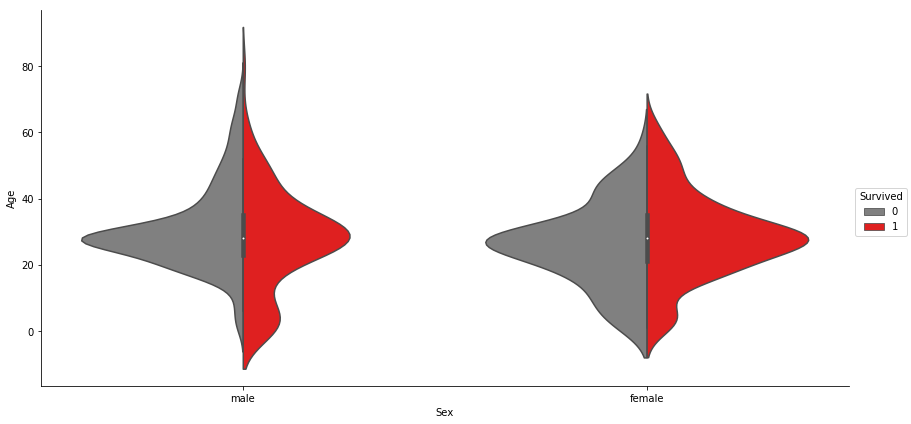

In [8]:
a = sns.factorplot(x='Sex',y='Age',hue='Survived',data=df,split=True,palette={0:"grey",1:'red'},size=6,kind='violin',aspect=2)

Factorplot is used in order to show multiple distributions of three variables 'Sex', 'Age', and 'Survived'.<br>
The plot above validates that,
>-  The shape of the distributions are roughly Gaussian.
>-  Especially, a large number of passengers between 20 to 30 died
>-  **By just looking at the male red plot, we can see that younger male are more likely to survive than old male.**
>-  Unlike old male passengers, a large number of old female passengers could survive.
>-  **Appearently, the age variable does not greatly affect the female survival as much as that of male's**

##### Fare

In [9]:
print(normaltest(df.Fare))

NormaltestResult(statistic=904.58727053269263, pvalue=3.727091062842147e-197)


The p-value of the normal test for Fare is 0, which means we can expect the distribution would be very skewed. (If the p-value is very small, it means it is unlikely that the data came from a normal distribution.)

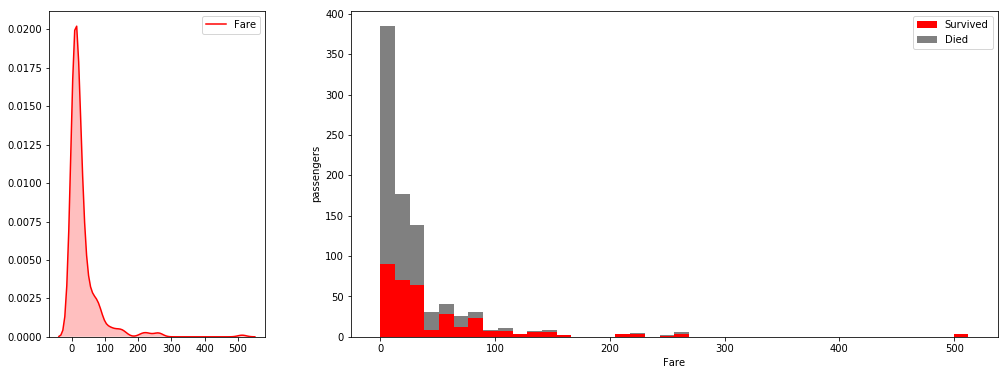

In [10]:
fig, (axis1,axis2) = plt.subplots(ncols=2, figsize=(17,6))
gs = gridspec.GridSpec(1,2,width_ratios=[1,3])
ax1 = plt.subplot(gs[0])
sns.kdeplot(df['Fare'],color='red',shade=True,ax=ax1)

ax2 = plt.subplot(gs[1])
ax2.hist([df[df['Survived']==1]['Fare'],df[df['Survived']==0]['Fare']],stacked=True,bins=40,color=['red','grey'],label=['Survived','Died'])

plt.xlabel("Fare")
plt.ylabel("passengers")
plt.legend()


>- The plot above shows clearly that **the number of deaths is decreasing as the fare price increases.**
>- We can infer that passengers who could afford **expensive fare tickets are more likely men of high social standing and could be rescued by priority.**

##### SibSp

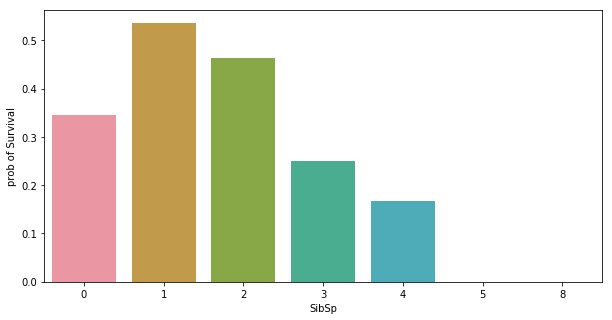

In [11]:
plt.figure(figsize=(10,5))
ss = sns.barplot(x='SibSp',y='Survived',data=df,ci=None)
ss = ss.set(ylabel='prob of Survival')

>- **Single passenger or passengers with a few siblings/spouses (<3) aboard the Titanic tend to survive.**
>- **From SibSp2, as the number of SibSp increases, the chance to survive abruptly decreases and even the probability of survival of very large families passengers (5 and 8) is zero.**

##### Parch

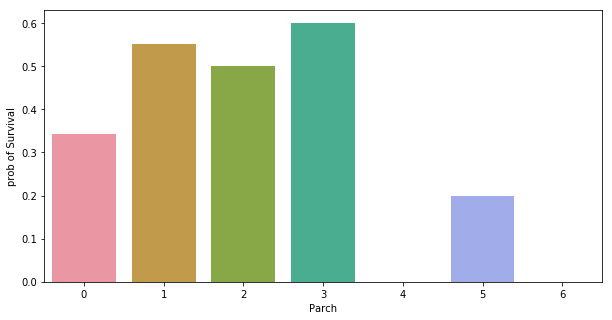

In [12]:
plt.figure(figsize=(10,5))
pc = sns.barplot(x='Parch',y='Survived',data=df,ci=None)
pc = pc.set(ylabel='prob of Survival')


The result is somewhat very similar to that of SibSp.
>- **Large families have less chance to survive.**
>- **Small families have even more chance to survive than single passengers.**

##### Embarked

In [13]:
# Let's check if there is any null value in the feature.
df.Embarked.isnull().sum()

2

In [14]:
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)
print(Counter(df.Embarked))

Counter({'S': 646, 'C': 168, 'Q': 77})


There were two missing values in Embarked so I filled them with the most frequent value 'S'

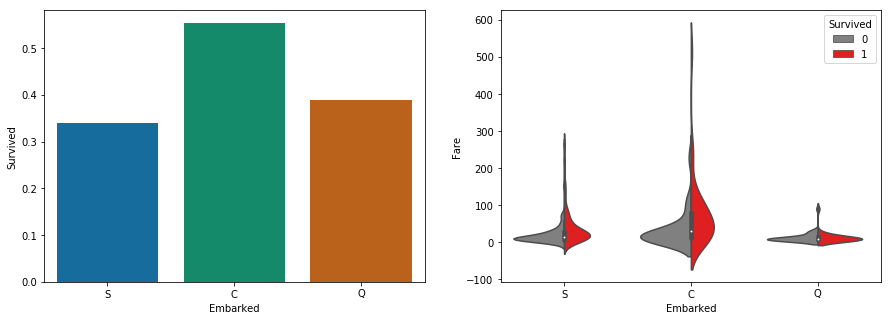

In [15]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='Embarked', y='Survived',data=df, ci=None,ax=axis1)
axis2.set(ylabel='prob of Survival')

em = sns.factorplot(x='Embarked',y='Fare',hue='Survived',data=df,kind='violin',palette={0:'grey',1:'red'}, size=6,split=True,ax=axis2)
plt.close(2)

On the left plot, the port which has the highest survival probability among three ports is 'C', Cherbourg but it seems it is still not clear and feels like we do not have enough information ,so we can get a bit more information by plotting one more figure (on the right plot). This plot shows the interactions among 'Embarked', 'Fare', and 'Survived'. One thing to note is that the tail of the 'C' distribution is particularly longer than other two, which means most of expensive fare tickets were sold at the port 'C' Cherbourg; consequently, passengers who can afford to it, as seen earlier in 'Fare' part, are more likely to survive.

##### Pclass

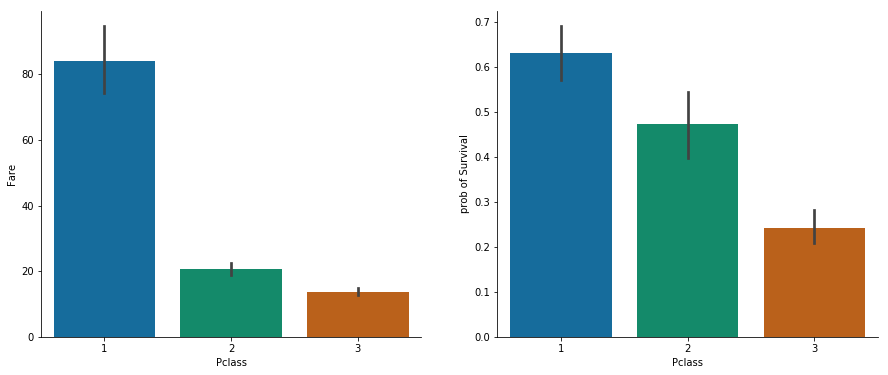

In [16]:
fig, axs = plt.subplots(ncols=2, figsize=(15,6))
sns.barplot(x='Pclass',y='Fare',data=df,ax=axs[0])
ps = sns.barplot(x='Pclass',y='Survived',data=df,ax=axs[1])
ps.set(ylabel='prob of Survival')
sns.despine(ax=axs[1], right=True, left=False)
sns.despine(ax=axs[0], right=True, left=False)


As the ticket class is higher (1st is the highest), Fare is more expensive and they have more chance to survive.

In [17]:
df[['Fare','Pclass','Survived']].corr()

,Fare,Pclass,Survived
Fare,1.000000,-0.549500,0.257307
Pclass,-0.549500,1.000000,-0.338481
Survived,0.257307,-0.338481,1.000000


As we expected, three features are correlated each other and they would be useful to predict survivals. 

##### Family Size

Instead of two seperate features 'Parch' and 'SibSp', we can combine two things in one feature 'Family_Size' and look into the relationship between family size and survivals in detail.

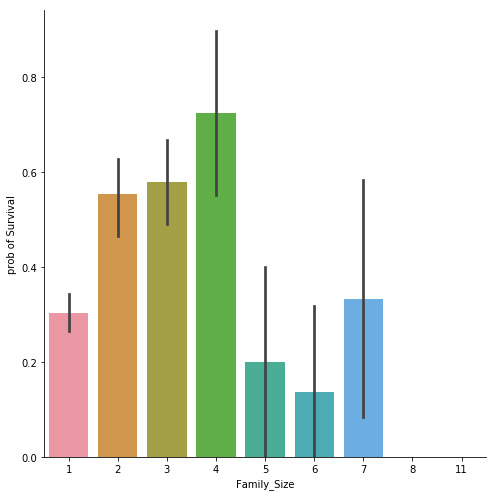

In [18]:
df['Family_Size'] = df['Parch'] + df['SibSp'] + 1

fs = sns.factorplot(x='Family_Size',y='Survived',kind='bar',data=df,size=7)
fs = fs.set(ylabel='prob of Survival')

It is not surprising that as seen before, small or medium size families have the best chance to survive. One difference between this and the previous analysis (Parch and SibSp) is that single has slightly lower probability of survivals than that of 7 member family. In my opinion, large families were more likely to get noticed by rescue teams than people traveling alone. Nevertheless, in general, large families have less chance to survive.

##### Cabin

In [19]:
print("number of missing values:",df.Cabin.isnull().sum())
df.Cabin.describe()

number of missing values: 687


count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [20]:
# Extract only the first letter if it is not nan else replace it with 'X'
df['Cabin'].fillna('X',inplace=True)
df['Cabin'] = df['Cabin'].map(lambda x:x[0])

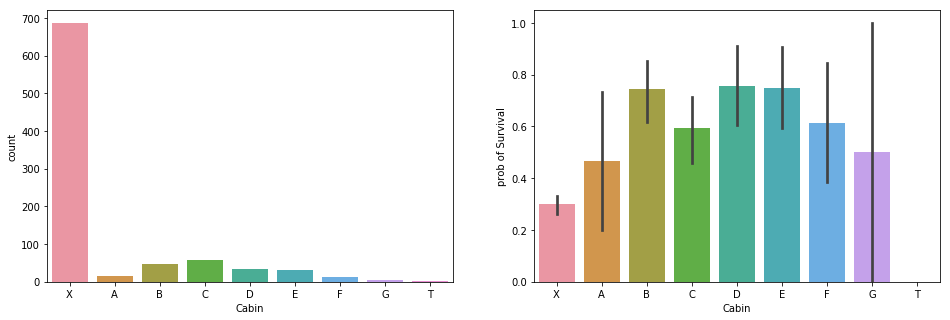

In [21]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(16,5))

# Distribution of cabin locations.
sns.factorplot(x='Cabin',data=df,size=6,kind='count',ci=None, order=['X','A','B','C','D','E','F','G','T'],ax=axis1)

# Survival rate according to cabin locations.
sns.factorplot(x='Cabin',y= 'Survived',data=df,size=6,kind='bar',order=['X','A','B','C','D','E','F','G','T'],ax=axis2)
axis2.set(ylabel='prob of Survival')
plt.close(2)
plt.close(3)

This feature may not be important because there are many missing values; nevertheless, the above plot shows the passengers who have cabin numbers, are more likely to survive than the passengers without them. Perhaps some location of the ship might be safer, sink later than other parts or has easier access to life boats. This can give us a hint of prediction.

##### Ticket

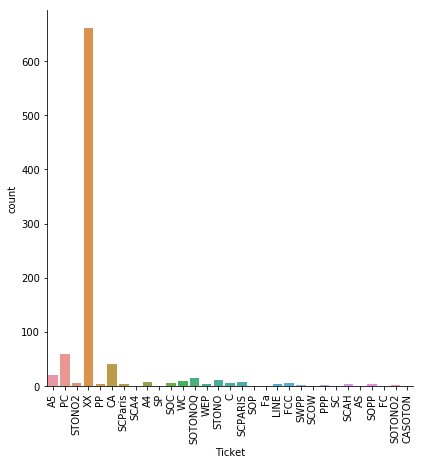

In [22]:
df['Ticket'] = df['Ticket'].map(lambda x:x.replace('/',''))
df['Ticket'] = df['Ticket'].map(lambda x:x.replace('.',''))
df['Ticket'] = df['Ticket'].map(lambda x: 'XX' if x.isdigit() else x.split(' ')[0])

t = sns.factorplot(x='Ticket',data=df,size=6,kind='count',ci=None)
t = t.set_xticklabels(rotation=90)

source: https://daily.social/this-is-how-you-choose-the-safest-seat-when-travelling-through-these-6-means-of-transport/


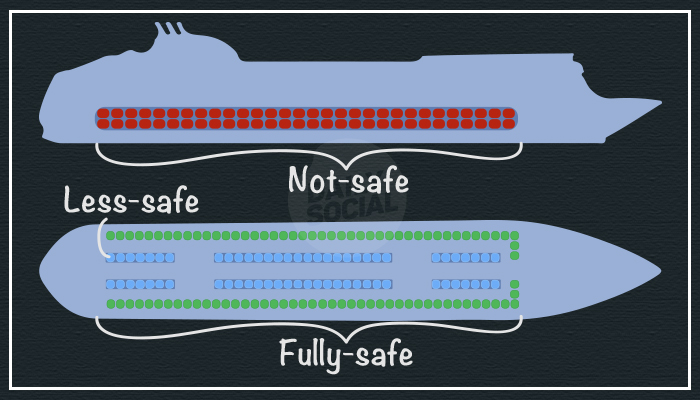

In [23]:
print("source: https://daily.social/this-is-how-you-choose-the-safest-seat-when-travelling-through-these-6-means-of-transport/")
Image(filename='safe_seats.jpg')

We need to extract meaningful data and replace digits with 'XX' so that it can greatly reduce noise. As mentioned in the cabin section, some location of the ship might be safer, sink later than other parts or has easier access to life boats. In my opinion, any information that provides location of the ship (e.g cabin, ticket number) can be useful to make a prediction of survivals. 

##### Name

Name feature seems to have too many distinct values which can cause overfitting so in order to avoid that, either we remove the feature or refine it for modeling. What we are going to do is extracting the only title part and converting to a binary variable (later in feature engineering part). Title contains social status and sex information which may play an important role in predicting survivals as we pointed out previously. 

In [24]:
df['Title'] = df['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())

In [25]:
df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

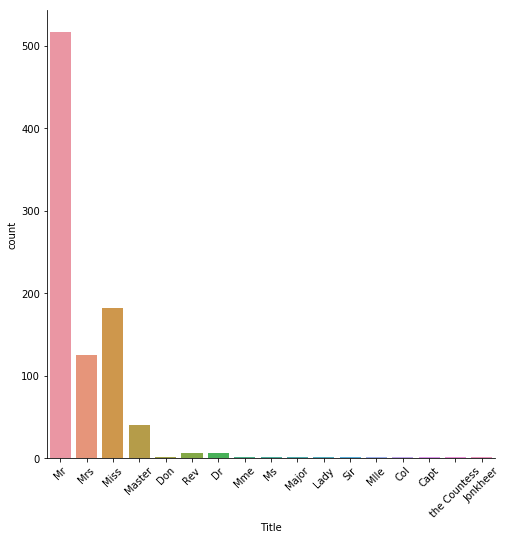

In [26]:
n = sns.factorplot(kind='count',x='Title',data=df,size=7)
n = n.set_xticklabels(rotation=45)

The distribution of the title shows that most of them are mr, mrs, miss, and master and most of other titles are minor

In [27]:
pd.crosstab(df['Survived'],df['Title'])

Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [28]:
df['Title'].replace(['Miss','Mlle','Mme','Mrs','Ms'],'Ms',inplace=True)
df['Title'].replace({'Mr':0,'Ms':1,'Master':2},inplace=True)
df['Title'] = df['Title'].map(lambda x:3 if type(x)==str else x)

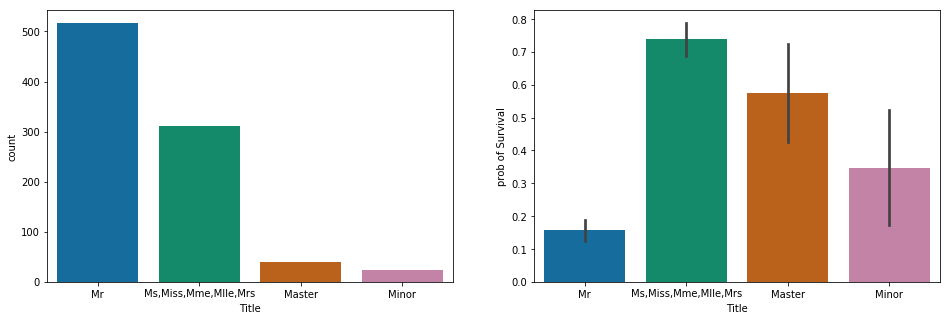

In [29]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(16,5))

# Distribution of titles.
sns.factorplot(x='Title',kind='count',size=6,data=df,ax=axis1)
axis1.set_xticklabels(['Mr','Ms,Miss,Mme,Mlle,Mrs', 'Master','Minor'])

# Survival rate categorized by titles.
sns.factorplot(x='Title',y='Survived',data=df, kind='bar',size=6,ax=axis2)
axis2.set_xticklabels(['Mr','Ms,Miss,Mme,Mlle,Mrs', 'Master','Minor'])
axis2.set(ylabel='prob of Survival')
plt.close(2)
plt.close(3)

As we can see, women and children (master is used as a title prefixed to the name of a boy not old enough to be callled mr) have high chance to survive and men have the lowest as expected. One thing to note is that Minor is high enough not to ignore.

## 3. Feature Engineering
<a id='feature_engineering'></a>

Based on the analysis result, we will manipulate and clean the data in order to run our model efficiently.

### Correlation check

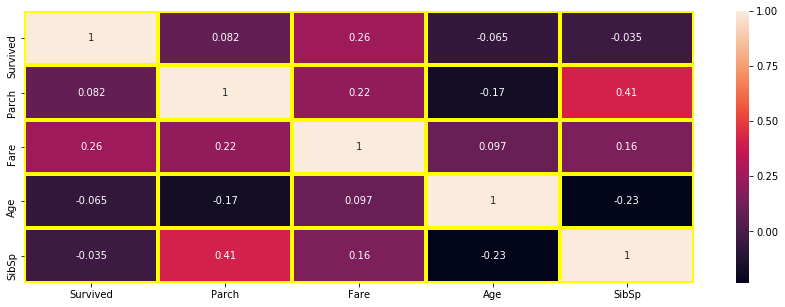

In [30]:
plt.figure(figsize=(15,5))
sns.heatmap(df[['Survived','Parch','Fare','Age','SibSp']].corr(),annot=True,linewidth=3,linecolor='yellow')

Except Fare, all the numerical variables in the map are weakly correlated with Survived feature; however, that does not mean that these features are not important or we should get rid of them. The method used for computing the correlation is Pearson method which shows only linear relationship between variables. We still do not know these variables may have some other relationship other than linear so just leave them and let's move on to the next step. 

### Combining train & test set

In order to avoid repeating unnecessary codes, for our convenience, let's combine the train and test set.

In [31]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

y_id = test.iloc[:,0]
y = train.iloc[:,1]

last_train_index = len(train)
first_test_index = len(train)

comb = pd.concat([train,test]).reset_index()
comb.drop(['PassengerId','Survived','index'],inplace=True, axis=1)

print("TrainSet:",train.shape,"TestSet:",test.shape,"CombinedSet:",comb.shape)

TrainSet: (891, 12) TestSet: (418, 11) CombinedSet: (1309, 10)


### Feature by feature

##### Embarked

In [32]:
# Let's see if there is any missing value in Embarked column.
Counter(comb.Embarked)

Counter({'S': 914, 'C': 270, 'Q': 123, nan: 2})

In [33]:
# Fill the missing values with the most frequent 'S'.
comb['Embarked'].fillna(comb.Embarked.mode()[0],inplace=True)

# Dummy encoding.
embarked_dummy = pd.get_dummies(comb['Embarked'],prefix='EM')

# Concatenate the combined with dummy variables.
comb = pd.concat([comb,embarked_dummy],axis=1)

##### Family Size

In [34]:
# In this time, create new feature in combined dataset
comb['Family_Size'] = comb['Parch'] + comb['SibSp'] + 1

# Categorize according to the size of family
comb['FS_single'] = comb['Family_Size'].map(lambda x: 1 if x==1 else 0)
comb['FS_small'] = comb['Family_Size'].map(lambda x: 1 if x==2 else 0)
comb['FS_medium'] = comb['Family_Size'].map(lambda x: 1 if 3<=x<=4 else 0)
comb['FS_large'] = comb['Family_Size'].map(lambda x: 1 if x>=5 else 0)


We repeated the exactly samething as we did in analysis part but in this time we added one more step "Categorization" 

##### Sex

In [35]:
# convert to male:1, female:0
comb['Sex'] = comb.Sex.map(lambda x: 1 if x =='male' else 0)


##### Fare

In [36]:
print('Missing Age Values :',comb.Fare.isnull().sum())

Missing Age Values : 1


In [37]:
comb['Fare'].fillna(comb['Fare'].median(),inplace=True)

##### Pclass

In [38]:
# Create new dummy variables for each Pclass
pclass_dummy = pd.get_dummies(comb['Pclass'],prefix='PC')

# Concatenate the combined with dummy variables.
comb = pd.concat([comb,pclass_dummy],axis=1)

##### Cabin

In [39]:
print("number of missing values:",comb.Cabin.isnull().sum())
comb.Cabin.describe()

number of missing values: 1014


count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

In [40]:
# If there are any missing values, fill them with 'X'.
comb['Cabin'].fillna('X',inplace=True)

# Extract only the first letter.
comb['Cabin'] = comb['Cabin'].map(lambda x:x[0])

# Create new dummy variables for each refined values.
cabin_dummy = pd.get_dummies(comb['Cabin'],prefix='CB')

# Concatenate the combined with dummy variables.
comb = pd.concat([comb,cabin_dummy],axis=1)

##### Ticket

In [41]:
comb.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [42]:
# If the ticket is only a digit, replace them with XX else extract each prefix.
comb['Ticket'] = comb['Ticket'].map(lambda x:x.replace('/',''))
comb['Ticket'] = comb['Ticket'].map(lambda x:x.replace('.',''))
comb['Ticket'] = comb['Ticket'].map(lambda x: 'XX' if x.isdigit() else x.split(' ')[0])

# Create new dummy variables for each refined values.
ticket_dummy = pd.get_dummies(comb['Ticket'],prefix='TK')

# Concatenate the combined with dummy variables.
comb = pd.concat([comb,ticket_dummy],axis=1)

##### Name

In [43]:
comb['Title'] = comb['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())

In [44]:
Counter(comb['Title'])

Counter({'Capt': 1,
         'Col': 4,
         'Don': 1,
         'Dona': 1,
         'Dr': 8,
         'Jonkheer': 1,
         'Lady': 1,
         'Major': 2,
         'Master': 61,
         'Miss': 260,
         'Mlle': 2,
         'Mme': 1,
         'Mr': 757,
         'Mrs': 197,
         'Ms': 2,
         'Rev': 8,
         'Sir': 1,
         'the Countess': 1})

In [45]:
# Convert equivalent female prefixes to Ms
comb['Title'].replace(['Miss','Mlle','Mme','Mrs','Ms'],'Ms',inplace=True)

# Convert titles to numeric values
comb['Title'].replace({'Mr':0,'Ms':1,'Master':2},inplace=True)
comb['Title'] = comb['Title'].map(lambda x:3 if type(x)==str else x)

# Create new dummy variables.
title_dummy = pd.get_dummies(comb['Title'],prefix='TLE')

# Concatenate the combined with dummy variables.
comb = pd.concat([comb,title_dummy],axis=1)

##### Age

In [46]:
print('Missing Age Values :',comb.Age.isnull().sum())
print('MissingAgeValues / Total :', comb.Age.isnull().sum()/len(comb))

Missing Age Values : 263
MissingAgeValues / Total : 0.200916730328


>- There are **263 missing values** in Age column, which consists of **20%** of total number of data; Therefore, simply filling nan values with median of age is not enough. 
>- Instead, **pick the most correlated features with Age** and compute the median age by grouping by chosen features. 

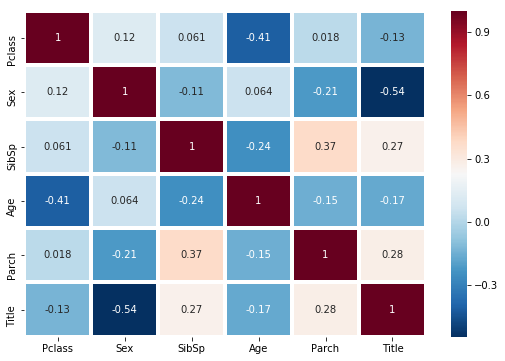

In [47]:
plt.figure(figsize=(9,6))

# Exclude PassengerID and Survived
col = ['Pclass','Sex','SibSp','Age','Parch','Title']

# Heatmap
a = sns.heatmap(comb[col].corr(),annot=True,linewidth=3,cmap='RdBu_r')

Pclass, SibSp, Parch and Title seem to be correlated with Age. The result makes sense since old passengers tend to have less siblings/spouses and parents (Parch and SibSp) and tend to be financially stable; therefore they pay more on better tickets (Pclass). Needless to say the title is also informative. 

In [48]:
comb['old_age'] = comb['Age']

comb['Age'] = comb.groupby(['Pclass','SibSp','Parch','Title'])['Age'].transform(lambda x: x.fillna(x.median()))
comb['Age'].fillna(comb['Age'].median(),inplace=True)

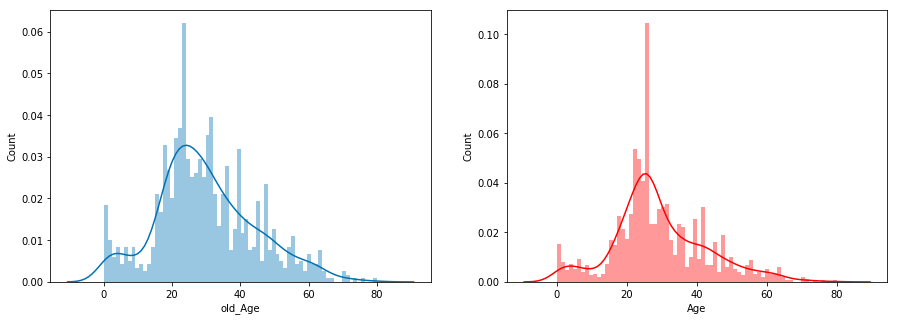

In [49]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
oa = sns.distplot(comb['old_age'].dropna(),ax=ax1,kde=True,bins=70)
a = sns.distplot(comb['Age'].dropna(),ax=ax2,kde=True,bins=70,color='red')
ax1.set_xlabel('old_Age')
ax1.set_ylabel('Count')
ax2.set_xlabel('Age')
ax2.set_ylabel('Count')

The left blue plot is the distribution of the age from original dataset after simply omitting missing values and the right red plot is the distribution of the age after filling missing values with the median ages of similar rows. As you can see, the distributions are almost identical.

##### Remove redundant features

In [50]:
comb.drop(['Cabin','Embarked','Name','Ticket','Title','old_age'],axis=1,inplace=True)

## 4. Modeling
<a id='modeling'></a>
-  Model Selection
-  Tuning Hyperparameters
-  Feature Importances

In [51]:
# Split the combined dataset into two: train and test

X_train = comb[:last_train_index]
X_test = comb[first_test_index:]

In [52]:
# Import the libraries we will be using

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,StratifiedKFold,learning_curve
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,Imputer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,VotingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier

### Model Selection

We will be evaluating below algorithms' cross validation means and errors. 

> - Support Vector Machine
> - Decision Tree
> - AdaBoost
> - Random Forest
> - Extra Trees
> - Gradient Boosting
> - XG Boosting

In [53]:
kfold = StratifiedKFold(n_splits=20, random_state = 2018)


In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [55]:
#algorithms = []
#random_seed = 1

#algorithms.append(KNeighborsClassifier())
#algorithms.append(LogisticRegression(random_state = random_seed))
#algorithms.append(MLPClassifier(random_state = random_seed))
#algorithms.append(SVC(random_state = random_seed))
#algorithms.append(DecisionTreeClassifier(random_state = random_seed))
#algorithms.append(AdaBoostClassifier(DecisionTreeClassifier(random_state = random_seed),random_state = random_seed, learning_rate = 0.01))
#algorithms.append(RandomForestClassifier(random_state = random_seed))
#algorithms.append(ExtraTreesClassifier(random_state = random_seed))
#algorithms.append(GradientBoostingClassifier(random_state = random_seed))

#scores = []
#for al in algorithms:
    #scores.append(cross_val_score(al, X_train, y, scoring="accuracy", cv=kfold, n_jobs=-1))

#cross_std = []
#cross_mean = []
#for score in scores:
    #cross_mean.append(score.mean())
    #cross_std.append(score.std())

#cross_df = pd.DataFrame({'Algorithms':['KNN','LogisticReg','MLP','SVM','DecisionTree','AdaBoost','RandomForest','ExtraTrees','GradientBoosting'],
#                        'CVmeans':cross_mean,'CVErr':cross_std})

#cross_df['Upper'] = cross_df['CVmeans'] + cross_df['CVErr']
#cross_df['Lower'] = cross_df['CVmeans'] - cross_df['CVErr']
#cross_df.sort_values('Upper',ascending=False)


In [56]:
#cvp = sns.factorplot(x='CVmeans',y='Algorithms',data=cross_df,orient='h',size=8, kind='bar',**{'xerr':cross_std})
#cvp.ax.set_title('Model Selection')

### Base Models

##### Gradient Boosting

In [75]:
GBC = GradientBoostingClassifier(random_state = 2018)
gb_param_grid = {
              'n_estimators' : [540],
              'learning_rate': [0.05],
              'max_depth': [4],
              'min_samples_leaf': [3],
              'subsample':[0.4]
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsGBC.fit(X_train,y)
GBC_best = gsGBC.best_estimator_
print(gsGBC.best_params_)

## cv = 20, random_state = 2018
#  
# ** {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 3, 'n_estimators': 540, 'subsample': 0.4}
# * {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 3, 'n_estimators': 550, 'subsample': 0.4}

## cv = 10, random_state = 1
# ***{'learning_rate': 0.06, 'max_depth': 4, 'min_samples_leaf': 3, 'n_estimators': 400, 'subsample': 0.3}
# **{'learning_rate': 0.07, 'max_depth': 4, 'min_samples_leaf': 3, 'n_estimators': 400, 'subsample': 0.3} 
# *{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 3, 'n_estimators': 500, 'subsample': 0.3} 

Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   15.8s finished


{'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 3, 'n_estimators': 540, 'subsample': 0.4}


In [76]:
gsGBC.best_score_
#kfold=40일때 83.95%

0.85072951739618408

In [72]:
#y_submission = gsGBC.predict(X_test)

##### AdaBoost

In [83]:
DTC = DecisionTreeClassifier(random_state = 2018)

adaDTC = AdaBoostClassifier(DTC, random_state = 2018)

ada_param_grid = {"base_estimator__criterion" : ["entropy"],
              "base_estimator__splitter" :   ["random"],
              "algorithm" : ["SAMME.R"],
              "n_estimators" :[3000],
              "learning_rate":  [0.0001]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1,verbose = 1)
gsadaDTC.fit(X_train,y)
ada_best = gsadaDTC.best_estimator_
print(gsadaDTC.best_params_)

## cv = 20, random_state = 2018
# *** {'algorithm': 'SAMME.R', 'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'random', 'learning_rate': 0.0001, 'n_estimators': 3000}
# ** {'algorithm': 'SAMME.R', 'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'random', 'learning_rate': 0.0001, 'n_estimators': 3000}
# * {'algorithm': 'SAMME.R', 'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'random', 'learning_rate': 0.0001, 'n_estimators': 3000}


## cv = 10, random_state = 1
# **** {'algorithm': 'SAMME', 'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'random', 'learning_rate': 0.03, 'n_estimators': 2770}
# *** {'algorithm': 'SAMME', 'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'random', 'learning_rate': 0.03, 'n_estimators': 2900}
# ** {'algorithm': 'SAMME', 'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'random', 'learning_rate': 0.03, 'n_estimators': 5000}
# * {'algorithm': 'SAMME', 'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'random', 'learning_rate': 0.01, 'n_estimators': 3000}

Fitting 20 folds for each of 6 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 14.7min finished


{'algorithm': 'SAMME.R', 'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'random', 'learning_rate': 0.0001, 'n_estimators': 3000}


In [84]:
gsadaDTC.best_score_

0.8271604938271605

In [85]:
#y_submission = gsadaDTC.predict(X_test)

##### SVM

In [116]:
gammas = [0.012]
Cs = [0.150]
weight = [{1:1}]
kernels = ['sigmoid']
param_grid = dict(C=Cs,gamma=gammas,class_weight=weight, kernel=kernels)
gsSVMC = GridSearchCV(SVC(probability=True, random_state = 2018),param_grid=param_grid,cv=kfold,scoring="accuracy",n_jobs=-1,verbose=1)
gsSVMC.fit(X_train,y)
gsSVMC_best = gsSVMC.best_estimator_
print(gsSVMC.best_params_)

## cv = 20, random_state = 2018
# **** {'C': 0.15, 'class_weight': {1: 1}, 'gamma': 0.012, 'kernel': 'sigmoid'}
# *** {'C': 0.15, 'class_weight': {1: 1}, 'gamma': 0.012, 'kernel': 'sigmoid'}
# ** {'C': 0.16, 'class_weight': {1: 1}, 'gamma': 0.011, 'kernel': 'sigmoid'}
# * {'C': 0.165, 'class_weight': {1: 1}, 'gamma': 0.01, 'kernel': 'sigmoid'}

## cv = 10, random_state = 1
# *****{'C': 0.46, 'class_weight': 'balanced', 'gamma': 0.006}
# **** {'C': 0.465, 'class_weight': 'balanced', 'gamma': 0.01}
# *** {'C': 0.485, 'class_weight': 'balanced', 'gamma': 0.02}
# **{'C': 0.49, 'class_weight': 'balanced', 'gamma': 0.02}
# *{'C': 0.5, 'gamma': 0.03}


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.1s finished


{'C': 0.15, 'class_weight': {1: 1}, 'gamma': 0.012, 'kernel': 'sigmoid'}


In [117]:
gsSVMC.best_score_

0.82940516273849607

In [118]:
#y_submission = gsSVMC.predict(X_test)

##### Random Forest

In [135]:
RFC = RandomForestClassifier(random_state = 2018)

rf_param_grid = {"max_depth": [7],
              "max_features": [31],
              "min_samples_leaf": [8],
              "n_estimators" :[349]
                }

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsRFC.fit(X_train,y)
RFC_best = gsRFC.best_estimator_
print(gsRFC.best_params_)

## cv = 20, random_state = 2018
# *** {'max_depth': 7, 'max_features': 31, 'min_samples_leaf': 8, 'n_estimators': 349} - 79.904
# ** {'max_depth': 7, 'max_features': 31, 'min_samples_leaf': 8, 'n_estimators': 350} - 79.904
# * {'max_depth': 7, 'max_features': 30, 'min_samples_leaf': 7, 'n_estimators': 410} - 78.947


## cv = 10, random_state = 1
# *** {'max_depth': 5, 'max_features': 16, 'min_samples_leaf': 1, 'n_estimators': 410}
# ** {'max_depth': 5, 'max_features': 16, 'min_samples_leaf': 1, 'n_estimators': 400}
# * {'max_depth': 5, 'max_features': 17, 'min_samples_leaf': 1, 'n_estimators': 500}

# {'max_depth': 9, 'max_features': 30, 'min_samples_leaf': 1, 'n_estimators': 2000}
# {'max_depth': 9, 'max_features': 30, 'min_samples_leaf': 7, 'n_estimators': 500}
# {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 500}
# {'bootstrap': True, 'criterion': 'gini', 'max_depth': 90, 'max_features': 17, 'min_samples_leaf': 2, 'n_estimators': 1000}
# {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 500}
# {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 17, 'min_samples_leaf': 5, 'n_estimators': 2000}

Fitting 20 folds for each of 972 candidates, totalling 19440 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 44.5min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 55.0min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 66.2min
[Parallel(n_jobs=-1)]: Done 11242 tasks      | elapsed: 78.9min
[Parallel(n_jobs=-1)]: Done 12792 tasks      | elapsed: 89

{'max_depth': 7, 'max_features': 31, 'min_samples_leaf': 8, 'n_estimators': 349}


In [136]:
gsRFC.best_score_

0.84511784511784516

In [137]:
y_submission = gsRFC.predict(X_test)

##### Logistic Regression

In [ ]:
#LR = LogisticRegression()

#lr_param_grid = {'C':[0.001,0.10,0.30,0.50,10,25,35],
#                'penalty' : ['l1','l2']}

#gsLR = GridSearchCV(LR,param_grid=lr_param_grid,cv=kfold,scoring='accuracy',verbose=1,n_jobs=-1)
#gsLR.fit(X_train,y)
#LR_best = gsLR.best_estimator_
#print(gsLR.best_params_)

# * {'C': 0.5, 'penalty': 'l1'}
#{'C': 0.5, 'penalty': 'l1'}
#{'C': 0.5, 'penalty': 'l1'}

In [ ]:
#gsLR.best_score_

In [ ]:
#y_submission = gsLR.predict(X_test)

##### Extra Tree

In [150]:
ExtC = ExtraTreesClassifier(random_state = 2018)

ex_param_grid = {
              "max_depth": [6],
              "max_features": ['auto'],
              "min_samples_leaf": [1],
              "n_estimators" :[360],
                 "bootstrap":[True]
                }
                
gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsExtC.fit(X_train,y)
ExtC_best = gsExtC.best_estimator_
print(gsExtC.best_params_)
                
## cv = 20, random_state = 2018
# *** 
# ** {'bootstrap': True, 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 360} - 78.947
# * {'bootstrap': True, 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 430} - 78.468

## cv = 10, random_state = 1    
# ** {'bootstrap': True, 'max_depth': 5, 'max_features': 27, 'min_samples_leaf': 1, 'n_estimators': 450}
# * {'bootstrap': True, 'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 1, 'n_estimators': 500}

#{'bootstrap': True, 'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 1, 'n_estimators': 500}
#{'bootstrap': True, 'criterion': 'gini', 'max_depth': 100, 'max_features': 2, 'min_samples_leaf': 3, 'n_estimators': 500}
#{'bootstrap': True, 'criterion': 'gini', 'max_depth': 50, 'max_features': 3, 'min_samples_leaf': 4, 'n_estimators': 1000}
#{'bootstrap': False, 'criterion': 'gini', 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 2, 'n_estimators': 500}
#{'bootstrap': False, 'criterion': 'gini', 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 2, 'n_estimators': 2000}

Fitting 20 folds for each of 2592 candidates, totalling 51840 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 51.9min
[Parallel(n_jobs=-1)]: Done 11242 tasks      | elapsed: 59.5min
[Parallel(n_jobs=-1)]: Done 12792 tasks      | elapsed: 67

{'bootstrap': True, 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 360}


In [151]:
gsExtC.best_score_

0.83838383838383834

In [152]:
y_submission = gsExtC.predict(X_test)

##### XGboost

In [172]:
XGB = XGBClassifier(random_state = 2018)

xg_param_grid = {
              'min_child_weight':[4],
              'n_estimators' : [490],
              'learning_rate': [0.2],
              'max_depth': [3],
              'subsample':[0.2],
              'gamma': [0]
}


gsXGB = GridSearchCV(XGB,param_grid = xg_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsXGB.fit(X_train,y)
print(gsXGB.best_params_)


## cv = 20, random_state = 2018

# ** {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 490, 'subsample': 0.2} - 76.555
# * {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 490, 'subsample': 0.3} - 76.076

## cv = 10, random_state = 1
# {'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 0.4}
#{'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 0.4}

Fitting 20 folds for each of 324 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 11.7min finished


{'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 490, 'subsample': 0.2}


In [173]:
XGB_best = gsXGB.best_estimator_

In [174]:
gsXGB.best_score_

0.83950617283950613

In [175]:
y_submission = gsXGB.predict(X_test)

In [180]:
votingC = VotingClassifier(estimators = [('rfc',RFC_best), ('extc',ExtC_best)
                                        ], voting='hard',n_jobs=-1)
votingC = votingC.fit(X_train,y)

y_submission = votingC.predict(X_test)


# 80.382
#('lr',LR_best), ('svc',gsSVMC),('adac',ada_best),('gbc',GBC_best), ('xgb',XGB_best), ('rfc',RFC_best), ('extc',ExtC_best)

In [192]:
# RandomForest + ExtraTrees +  Meta(XGB)
XGB = XGBClassifier(random_state = 2018)

ExtC = ExtraTreesClassifier(random_state = 2018)
RFC = RandomForestClassifier(random_state = 2018)

stack = StackingClassifier(classifiers = [ExtC, RFC], meta_classifier = XGB)

params = {
              'meta-xgbclassifier__n_estimators' : [430],
              'meta-xgbclassifier__learning_rate': [0.4],
              'meta-xgbclassifier__max_depth': [2],
    
              'randomforestclassifier__max_depth':[7],
              'randomforestclassifier__max_features':[31],
              'randomforestclassifier__min_samples_leaf':[8],
              'randomforestclassifier__n_estimators':[349],
    
              "extratreesclassifier__max_depth": [6],
              "extratreesclassifier__max_features": ['auto'],
              "extratreesclassifier__min_samples_leaf": [1],
              "extratreesclassifier__n_estimators" :[360],
              "extratreesclassifier__bootstrap":[True]

        }

grid = GridSearchCV(estimator = stack, param_grid=params,cv=kfold,refit=True, scoring="accuracy", n_jobs= -1, verbose = 1)
grid.fit(X_train, y)
grid_best = grid.best_estimator_
print(grid.best_params_)

## cv = 20, random_state = 2018 (all below two 0.382)

# **
#'meta-xgbclassifier__learning_rate': 0.4, 'meta-xgbclassifier__max_depth': 2, 'meta-xgbclassifier__n_estimators': 430 }'

# * {'extratreesclassifier__bootstrap': True, 'extratreesclassifier__max_depth': 6, 
#'extratreesclassifier__max_features': 'auto', 'extratreesclassifier__min_samples_leaf': 1, 
#'extratreesclassifier__n_estimators': 360, 
#'meta-xgbclassifier__learning_rate': 0.4, 'meta-xgbclassifier__max_depth': 2, 'meta-xgbclassifier__n_estimators': 500, 
#'randomforestclassifier__max_depth': 7, 'randomforestclassifier__max_features': 31, 
#'randomforestclassifier__min_samples_leaf': 8, 'randomforestclassifier__n_estimators': 349} - 80.382


## cv = 10, random_state = 1
# * {'meta-xgbclassifier__colsample_bytree': 1, 
#'meta-xgbclassifier__learning_rate': 0.2, 'meta-xgbclassifier__max_depth': 3, 
#'meta-xgbclassifier__min_child_weight': 0.3, 'meta-xgbclassifier__n_estimators': 300, 
#'meta-xgbclassifier__subsample': 0.5, 'randomforestclassifier__max_depth': 5, 
#'randomforestclassifier__max_features': 16, 'randomforestclassifier__min_samples_leaf': 1, 
#'randomforestclassifier__n_estimators': 410}

# ** 결과

Fitting 20 folds for each of 140 candidates, totalling 2800 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 2800 out of 2800 | elapsed: 33.5min finished


{'extratreesclassifier__bootstrap': True, 'extratreesclassifier__max_depth': 6, 'extratreesclassifier__max_features': 'auto', 'extratreesclassifier__min_samples_leaf': 1, 'extratreesclassifier__n_estimators': 360, 'meta-xgbclassifier__learning_rate': 0.4, 'meta-xgbclassifier__max_depth': 2, 'meta-xgbclassifier__n_estimators': 430, 'randomforestclassifier__max_depth': 7, 'randomforestclassifier__max_features': 31, 'randomforestclassifier__min_samples_leaf': 8, 'randomforestclassifier__n_estimators': 349}


In [193]:
y_submission = grid.predict(X_test)

In [214]:
# RandomForest + ExtraTrees + SVM + Meta(XGB)

XGB = XGBClassifier(random_state = 2018)

ExtC = ExtraTreesClassifier(random_state = 2018)
RFC = RandomForestClassifier(random_state = 2018)
SVMC = SVC(probability=True, random_state = 2018)

stack = StackingClassifier(classifiers = [ExtC, RFC, SVMC], meta_classifier = XGB)

params = {
              'meta-xgbclassifier__n_estimators' : [200, 220, 230, 240, 250, 252, 253],
              'meta-xgbclassifier__learning_rate': [1.5,1.0,0.99,0.98],
              'meta-xgbclassifier__max_depth': [1,2,3],
              
              'randomforestclassifier__max_depth':[7],
              'randomforestclassifier__max_features':[31],
              'randomforestclassifier__min_samples_leaf':[8],
              'randomforestclassifier__n_estimators':[349],
    
              "extratreesclassifier__max_depth": [6],
              "extratreesclassifier__max_features": ['auto'],
              "extratreesclassifier__min_samples_leaf": [1],
              "extratreesclassifier__n_estimators" :[360],
              "extratreesclassifier__bootstrap":[True],
    
              'svc__gamma': [0.012],
              'svc__class_weight': ['balanced',{1:1}],
              'svc__C':[0.15],
              'svc__kernel':['sigmoid','rbf']

        }

grid = GridSearchCV(estimator = stack, param_grid=params,cv=kfold,refit=True, scoring="accuracy", n_jobs= -1, verbose = 1)
grid.fit(X_train, y)
grid_best = grid.best_estimator_
print(grid_best)


## cv = 20, random_state = 2018

# **** meta_classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#       colsample_bytree=1, gamma=0, learning_rate=0.99, max_delta_step=0,
#       max_depth=1, min_child_weight=1, missing=None, n_estimators=250,
#       n_jobs=1, nthread=None, objective='binary:logistic',
#       random_state=2018, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
#       seed=None, silent=True, subsample=1, 0.80382

# *** 


Fitting 20 folds for each of 336 candidates, totalling 6720 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 12.6min


KeyboardInterrupt: 

In [212]:
y_submission = grid.predict(X_test)

In [ ]:
# RandomForest + ExtraTrees + Meta(SVM)

ExtC = ExtraTreesClassifier(random_state = 2018)
RFC = RandomForestClassifier(random_state = 2018)
SVMC = SVC(probability = True, random_state = 2018)

stack = StackingClassifier(classifiers = [ExtC, RFC], meta_classifier = SVMC)

params = {    
              'randomforestclassifier__max_depth':[7],
              'randomforestclassifier__max_features':[31],
              'randomforestclassifier__min_samples_leaf':[8],
              'randomforestclassifier__n_estimators':[349],
    
              "extratreesclassifier__max_depth": [6],
              "extratreesclassifier__max_features": ['auto'],
              "extratreesclassifier__min_samples_leaf": [1],
              "extratreesclassifier__n_estimators" :[360],
              "extratreesclassifier__bootstrap":[True],
    
              'meta-svc__gamma': [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1],
              'meta-svc__class_weight': ['balanced',{1:1},{1:2}],
              'meta-svc__kernel': ['rbf','sigmoid'],
              'meta-svc__C':[0.001,0.003,0.005,0.007,0.009,0.10,0.30,0.50,1,3,5,10,25,35]
        }

grid = GridSearchCV(estimator = stack, param_grid = params,cv = kfold,refit = True, verbose = 1, n_jobs=-1)
grid.fit(X_train, y)
grid_best = grid.best_estimator_
print(grid_best)


## cv = 20, random_state = 2018
#  
#
# *


## cv = 10, random_state = 1
#StackingClassifier(average_probas=False,
        #classifiers=[ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
        #max_depth=5, max_features=27, max_leaf_nodes=None,
        #min_impurity_decrease=0.0, min_impurity_split=None,
        #min_samples_leaf=1, min_samples_split=2,
        #min_weight_fraction_leaf=...estimators=410, n_jobs=1,
        #oob_score=False, random_state=1, verbose=0, warm_start=False)],
        #meta_classifier=SVC(C=0.1, cache_size=200, class_weight={1: 4}, coef0=0.0,
        #decision_function_shape='ovr', degree=3, gamma=0.04, kernel='rbf',
        #max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
        #verbose=False),
        #store_train_meta_features=False, use_clones=True,
        #use_features_in_secondary=False, use_probas=False, verbose=0)
        
#결과 별루

In [ ]:
y_submission = grid.predict(X_test)

### Learning Curve

A learning curve compares the performace of a model on training and testing data over a varying number of training instances. By plotting learning curves for each model, we can diagnose whether models are overfitted or underfitted

In [ ]:
def lcplot(model,X,y,title,train_sizes=np.linspace(0.1,1.0,5)):
    
    train_sizes, train_scores, test_scores = learning_curve(model,X,y,cv=kfold,n_jobs=-1,train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Training size")
    plt.ylabel("Score")
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha = 0.1, color='b')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha = 0.1, color='g')
    plt.plot(train_sizes,train_scores_mean, 'o-', color='b', label='Training Score')
    plt.plot(train_sizes,test_scores_mean, 'o-', color='g', label='CV score')
    plt.legend(loc='best')
    return plt

g = lcplot(gsadaDTC.best_estimator_,X_train,y,"AdaBoost")
g = lcplot(gsGBC.best_estimator_,X_train,y,"GradientBoost")
g = lcplot(gsRFC.best_estimator_,X_train,y,"RandomForest")
g = lcplot(gsExtC.best_estimator_,X_train,y,"ExtraTrees")
g = lcplot(gsSVMC.best_estimator_,X_train,y,"SVM")
g = lcplot(gsXGB.best_estimator_,X_train,y,"XGBoost")


In [ ]:
# convert numpy array type to data frame in order to use the column names for feature selection
# (on the process of normalization, the type of the data were converted)

X_train = pd.DataFrame(X_train, columns=[comb.columns])
X_test = pd.DataFrame(X_test, columns=[comb.columns])


### Feature Importance

Based on the result of optimization parameters of tree base models, we can plot regarding the feature importance which gives you a sense of which of your features have the most effect in these models. With the results, you can use that information to engineer new features, drop out features that look not informative, or just to inform you as you continue building models.

In [ ]:
fig, axes = plt.subplots(2,2,sharex='all',figsize=(20,30))
features = pd.DataFrame()

estimators = [('ExtraTrees',ExtC_best),('GradientBoosting',GBC_best),('AdaBoosting',ada_best),('RandomForest',RFC_best)]#,('XGBoost',XGB_best)]
init_dim = 231
number = 0
color = ['red','orange','green','blue','purple']
for name,estimator in estimators:
    features[name + '_feature'] = X_train.columns
    features[name + '_importance'] = estimator.feature_importances_
    features.sort_values(by=[name + '_importance'], ascending=True, inplace=True)
    features.set_index(name + '_feature',inplace=True)
    
    g = features[name + '_importance'][-40:].plot(kind='barh',figsize=(25,25),ax=plt.subplot(init_dim),color=color[number])
    g.tick_params(labelsize=10)
    g.set_ylabel(name + ' Features',fontsize=18)
    g.set_xlabel('Importace',fontsize=15)
    g.spines['right'].set_visible(False)
    g.spines['top'].set_visible(False)
    init_dim += 1
    number += 1

In [ ]:
features.index.names = ['feature']
ET_40 = list(features.ExtraTrees_importance.sort_values(ascending=False)[:22].index)
GB_40 = list(features.GradientBoosting_importance.sort_values(ascending=False)[:10].index)
AB_40 = list(features.AdaBoosting_importance.sort_values(ascending=False)[:10].index)
RF_40 = list(features.RandomForest_importance.sort_values(ascending=False)[:22].index)
XB_40 = list(features.XGBoost_importance.sort_values(ascending=False)[:10].index)

top_40 = list(set(ET_40 + RF_40))# GB_40 + AB_40 + XB_40))
len(top_40)

In [ ]:
reduced_train = X_train[top_40]
reduced_test = X_test[top_40]

In [ ]:
RFC = RandomForestClassifier(random_state = 2018)

rf_param_grid = {"max_depth": [9],
              "max_features": [35],
              "min_samples_leaf": [3],
              "n_estimators" :[10000]
                }

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsRFC.fit(reduced_train,y)
RFC_best = gsRFC.best_estimator_
print(gsRFC.best_params_)

## cv = 20, random_state = 2018
#  
#
# *


## cv = 10, random_state = 1
## *** {'max_depth': 9, 'max_features': 35, 'min_samples_leaf': 3, 'n_estimators': 1000} (ET + RF only)

In [ ]:
gsRFC.best_score_

In [ ]:
y_submission = gsRFC.predict(reduced_test)

In [ ]:
XGB = XGBClassifier(random_state = 2018)

xg_param_grid = {
              'min_child_weight':[0.5,0.7,1,1.2],
              'n_estimators' : [100,300,500,1000,10000],
              'learning_rate': [0.2,0.1, 0.05, 0.01,0.001],
              'max_depth': [3,5,7,9,11],
              'subsample':[0.3,0.4,0.5,0.7,0.9],
              'colsample_bytree':[0.5,0.6,0.7,0.8,0.9]
              }
                
gsXGB = GridSearchCV(XGB,param_grid = xg_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsXGB.fit(reduced_train,y)
XGB_best = gsXGB.best_estimator_
print(gsXGB.best_params_)



In [ ]:
gsXGB.best_score_

In [ ]:
#y_submission = gsXGB.predict(reduced_test)

In [ ]:
ExtC = ExtraTreesClassifier(random_state = 2018)

ex_param_grid = {"max_depth": [5,6,7],
              "max_features": [2,3,4,5,6,7,8,9,10,'log2'],
              "min_samples_leaf": [1,2,3],
              "n_estimators" :[300,330,350,400,430,450,470,500],
                 "bootstrap":[True,False]
                }
                
gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsExtC.fit(reduced_train,y)
ExtC_best = gsExtC.best_estimator_
print(gsExtC.best_params_)

## cv = 20, random_state = 2018
#  
#
# *

## cv = 10, random_state = 1
# {'bootstrap': False, 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 3, 'n_estimators': 500} (ET + RF only) 78.947
## {'bootstrap': False, 'max_depth': 6, 'max_features': 6, 'min_samples_leaf': 2, 'n_estimators': 400} 78.947
### {'bootstrap': True, 'max_depth': 6, 'max_features': 7, 'min_samples_leaf': 1, 'n_estimators': 330} 79.425

In [ ]:
gsExtC.best_score_

In [ ]:
y_submission = gsExtC.predict(reduced_test)

In [ ]:
gammas = [0.01]
Cs = [3]
weight = ['balanced']
kernels = ['rbf']

param_grid = dict(C=Cs,gamma=gammas,class_weight = weight, kernel = kernels)
gsSVMC = GridSearchCV(SVC(probability=True, random_state = 2018),param_grid=param_grid,cv=kfold,scoring="accuracy",n_jobs=-1,verbose=1)
gsSVMC.fit(reduced_train,y)
gsSVMC_best = gsSVMC.best_estimator_
print(gsSVMC.best_params_)


## cv = 20, random_state = 2018
#  
#
# *

## cv = 10, random_state = 1
#{'C': 3, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
gsSVMC.best_score_

In [ ]:
y_submission = gsSVMC.predict(reduced_test)

In [ ]:
DTC = DecisionTreeClassifier(random_state = 2018)

adaDTC = AdaBoostClassifier(DTC, random_state = 2018)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1000,2000,3000],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1,verbose = 1)
gsadaDTC.fit(reduced_train,y)
ada_best = gsadaDTC.best_estimator_
print(gsadaDTC.best_params_)

## cv = 20, random_state = 2018
#  
#
# *


## cv = 10, random_state = 1
#{'algorithm': 'SAMME', 'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'random', 'learning_rate': 0.3, 'n_estimators': 1000}
#{'algorithm': 'SAMME.R', 'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'best', 'learning_rate': 0.0001, 'n_estimators': 2000}
#{'algorithm': 'SAMME', 'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best', 'learning_rate': 1.5, 'n_estimators': 1000}
#{'algorithm': 'SAMME.R', 'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best', 'learning_rate': 0.1, 'n_estimators': 1000}
#{'algorithm': 'SAMME.R', 'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'best', 'learning_rate': 0.01, 'n_estimators': 1000}
#{'algorithm': 'SAMME.R', 'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best', 'learning_rate': 0.01, 'n_estimators': 2000}

In [ ]:
gsadaDTC.best_score_

In [ ]:
#y_submission = gsadaDTC.predict(X_test)

In [ ]:
GBC = GradientBoostingClassifier(random_state = 2018)
gb_param_grid = {
              'n_estimators' : [500,1000,2000],
              'learning_rate': [0.2,0.1, 0.05, 0.01,0.001],
              'max_depth': [3,5,7,9,11],
              'min_samples_leaf': [1,2,3,4,5],
              'subsample':[0.3,0.4,0.5,0.7,0.9]
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsGBC.fit(reduced_train,y)
GBC_best = gsGBC.best_estimator_
print(gsGBC.best_params_)


## cv = 20, random_state = 2018
#  
#
# *

## cv = 10, random_state = 1
#{'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 500, 'subsample': 0.9}
#{'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 5, 'n_estimators': 500, 'subsample': 0.5}
#{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 110, 'max_features': 17, 'min_samples_leaf': 100, 'n_estimators': 1000}
#{'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 1000, 'subsample': 0.7}

In [ ]:
gsGBC.best_score_

In [ ]:
#y_submission = gsGBC.predict(X_test)

In [ ]:
def lcplot(model,X,y,title,train_sizes=np.linspace(0.1,1.0,5)):
    
    train_sizes, train_scores, test_scores = learning_curve(model,X,y,cv=kfold,n_jobs=-1,train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Training size")
    plt.ylabel("Score")
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha = 0.1, color='b')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha = 0.1, color='g')
    plt.plot(train_sizes,train_scores_mean, 'o-', color='b', label='Training Score')
    plt.plot(train_sizes,test_scores_mean, 'o-', color='g', label='CV score')
    plt.legend(loc='best')
    return plt

g = lcplot(gsadaDTC.best_estimator_,reduced_train,y,"AdaBoost")
g = lcplot(gsGBC.best_estimator_,reduced_train,y,"GradientBoost")
g = lcplot(gsRFC.best_estimator_,reduced_train,y,"RandomForest")
g = lcplot(gsExtC.best_estimator_,reduced_train,y,"ExtraTrees")
g = lcplot(gsSVMC.best_estimator_,reduced_train,y,"SVM")
g = lcplot(gsXGB.best_estimator_,reduced_train,y,"XGBoost")



##### Maximum Voting Ensemble

In [177]:
votingC = VotingClassifier(estimators = [('rfc',RFC_best), ('extc',ExtC_best)
                                        ], voting='soft',n_jobs=-1)
votingC = votingC.fit(reduced_train,y)

y_submission = votingC.predict(reduced_test)

#('lr',LR_best), ('svc',gsSVMC),('adac',ada_best),('gbc',GBC_best), ('xgb',XGB_best), ('rfc',RFC_best), ('extc',ExtC_best)

NameError: name 'reduced_train' is not defined

In [ ]:
votingC.scores = cross_val_score(votingC, reduced_train, y, cv=kfold)
print(votingC.scores.mean())

##### Stacking

In [ ]:
# RandomForest + ExtraTrees + Meta(XGB)

XGB = XGBClassifier(random_state = 2018)

ExtC = ExtraTreesClassifier(random_state = 2018)
RFC = RandomForestClassifier(random_state = 2018)

stack = StackingClassifier(classifiers = [ExtC, RFC], meta_classifier = XGB, random_state = 2018)

params = {
              'meta-xgbclassifier__min_child_weight':[0.5,0.7,1,1.2],
              'meta-xgbclassifier__n_estimators' : [100,300,500,1000,5000,7000,10000],
              'meta-xgbclassifier__learning_rate': [0.2,0.1, 0.05, 0.01,0.001],
              'meta-xgbclassifier__max_depth': [3,5,7,9,11],
              'meta-xgbclassifier__subsample':[0.3,0.4,0.5,0.7,0.9,1],
              'meta-xgbclassifier__colsample_bytree':[0.5,0.6,0.7,0.8,0.9,1],
              
              'randomforestclassifier__max_depth':[None,3,5,7,9,11],
              'randomforestclassifier__max_features':['auto','sqrt','log2',17,20,25,30,35],
              'randomforestclassifier__min_samples_leaf':[1,2,3,4,5,7],
              'randomforestclassifier__n_estimators':[500,1000,2000],
    
              'extratreesclassifier__max_depth':[None,3,5,7,9,11],
              'extratreesclassifier__max_features':['auto','sqrt','log2',17,20,25,30,35],
              'extratreesclassifier__min_samples_leaf':[1,2,3,4,5,7],
              'extratreesclassifier__n_estimators':[500,1000,2000],
              'extratreesclassifier__bootstrap':[True,False]
        }

grid = GridSearchCV(estimator = stack, param_grid=params,cv=kfold,refit=True)
grid.fit(reduced_train, y)
grid_best = grid.best_estimator_
print(grid_best)

In [ ]:
#y_submission = stackC.predict(reduced_test)

In [ ]:
# RandomForest + ExtraTrees + SVM + Meta(XGB)

XGB = XGBClassifier(random_state = 2018)

ExtC = ExtraTreesClassifier(random_state = 2018)
RFC = RandomForestClassifier(random_state = 2018)
SVMC = SVC(kernel='rbf',probability=True, random_state = 2018)

stack = StackingClassifier(classifiers = [ExtC, RFC, SVMC], meta_classifier = XGB, random_state = 2018)

params = {
              'meta-xgbclassifier__min_child_weight':[0.5,0.7,1,1.2],
              'meta-xgbclassifier__n_estimators' : [100,300,500,1000,5000,7000,10000],
              'meta-xgbclassifier__learning_rate': [0.2,0.1, 0.05, 0.01,0.001],
              'meta-xgbclassifier__max_depth': [3,5,7,9,11],
              'meta-xgbclassifier__subsample':[0.3,0.4,0.5,0.7,0.9,1],
              'meta-xgbclassifier__colsample_bytree':[0.5,0.6,0.7,0.8,0.9,1],
              
              'randomforestclassifier__max_depth':[None,3,5,7,9,11],
              'randomforestclassifier__max_features':['auto','sqrt','log2',17,20,25,30,35],
              'randomforestclassifier__min_samples_leaf':[1,2,3,4,5,7],
              'randomforestclassifier__n_estimators':[500,1000,2000],
    
              'extratreesclassifier__max_depth':[None,3,5,7,9,11],
              'extratreesclassifier__max_features':['auto','sqrt','log2',17,20,25,30,35],
              'extratreesclassifier__min_samples_leaf':[1,2,3,4,5,7],
              'extratreesclassifier__n_estimators':[500,1000,2000],
              'extratreesclassifier__bootstrap':[True,False],
    
              'svc__gamma': [0.01,0.03,0.05,0.1],
              'svc__weight': ['balanced',{1:2},{1:3},{1:4},{1:5},{1:10}],
              'svc__C':[0.001,0.10,0.30,0.50,1,3,5,10,25,35]
        }

grid = GridSearchCV(estimator = stack, param_grid=params,cv=kfold,refit=True)
grid.fit(reduced_train, y)
grid_best = grid.best_estimator_
print(grid_best)

In [ ]:
#y_submission = stackC.predict(reduced_test)

In [ ]:
# RandomForest + ExtraTrees + Meta(SVM)

XGB = XGBClassifier(random_state = 2018)

ExtC = ExtraTreesClassifier(random_state = 2018)
RFC = RandomForestClassifier(random_state = 2018)
SVMC = SVC(kernel='rbf',probability = True, random_state = 2018)

stack = StackingClassifier(classifiers = [ExtC, RFC], meta_classifier = SVMC, random_state = 2018)

params = {    
              'randomforestclassifier__max_depth':[None,3,5,7,9,11],
              'randomforestclassifier__max_features':['auto','sqrt','log2',17,20,25,30,35],
              'randomforestclassifier__min_samples_leaf':[1,2,3,4,5,7],
              'randomforestclassifier__n_estimators':[500,1000,2000],
    
              'extratreesclassifier__max_depth':[None,3,5,7,9,11],
              'extratreesclassifier__max_features':['auto','sqrt','log2',17,20,25,30,35],
              'extratreesclassifier__min_samples_leaf':[1,2,3,4,5,7],
              'extratreesclassifier__n_estimators':[500,1000,2000],
              'extratreesclassifier__bootstrap':[True,False],
    
              'meta-svc__gamma': [0.01,0.03,0.05,0.1],
              'meta-svc__weight': ['balanced',{1:2},{1:3},{1:4},{1:5},{1:10}],
              'meta-svc__C':[0.001,0.10,0.30,0.50,1,3,5,10,25,35]
        }

grid = GridSearchCV(estimator = stack, param_grid = params,cv = kfold,refit = True)
grid.fit(reduced_train, y)
grid_best = grid.best_estimator_
print(grid_best)

In [ ]:
#y_submission = stackC.predict(reduced_test)

## Submission
<a id='submission'></a>

In [213]:
my_submission = pd.DataFrame({'PassengerId':y_id,'Survived':y_submission})
my_submission.to_csv('submission11.csv',index=False)  

Thank you for your time and I hope this notebook helpful ! 